# CHAPTER 06 머신러닝, 딥러닝 기초 이론

## 2. 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

### 2.5 데이터 불러오기

In [2]:
import pandas as pd
training_data = pd.read_csv('./Data/well_logs_Hall.csv')
training_data

,Facies,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M
0,0,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,NM
1,0,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,NM
2,0,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,NM
3,0,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,NM
4,0,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,NM
...,...,...,...,...,...,...,...,...,...
3227,1,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,M
3228,1,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,M
3229,1,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,M
3230,1,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,M


In [3]:
training_data['Well Name'].value_counts()

CROSS H CATTLE     501
SHRIMPLIN          471
NEWBY              463
LUKE G U           461
SHANKLE            449
NOLAN              415
CHURCHMAN BIBLE    404
Recruit F9          68
Name: Well Name, dtype: int64

### 2.6. 데이터 훑어보기

In [4]:
training_data.head()

,Facies,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M
0,0,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,NM
1,0,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,NM
2,0,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,NM
3,0,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,NM
4,0,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,NM


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 9 columns):
Facies       3232 non-null int64
Well Name    3232 non-null object
Depth        3232 non-null float64
GR           3232 non-null float64
ILD_log10    3232 non-null float64
DeltaPHI     3232 non-null float64
PHIND        3232 non-null float64
PE           2769 non-null float64
NM_M         3232 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 227.3+ KB


In [6]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,2769.000000
mean,0.444307,2875.824567,66.135769,0.642719,3.559642,13.483213,3.717207
std,0.496965,131.006274,30.854826,0.241845,5.228948,7.698980,0.943923
min,0.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000
25%,0.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.078000
50%,0.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.500000
75%,1.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.371000
max,1.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000


### 2.7 데이터 시각화

#### 검층 데이터와 암상

In [7]:
# Facies: 0=clastic sediment rocks 1=organic/chemical sedimentary rocks

facies_colors = ['#C0C0C0', '#000000']
facies_labels = ['Clastic', 'Chemical']

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [8]:
def make_facies_log_plot(logs, facies_colors):
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=1)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((100*' ').join(['Clastic',  'Chemical']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

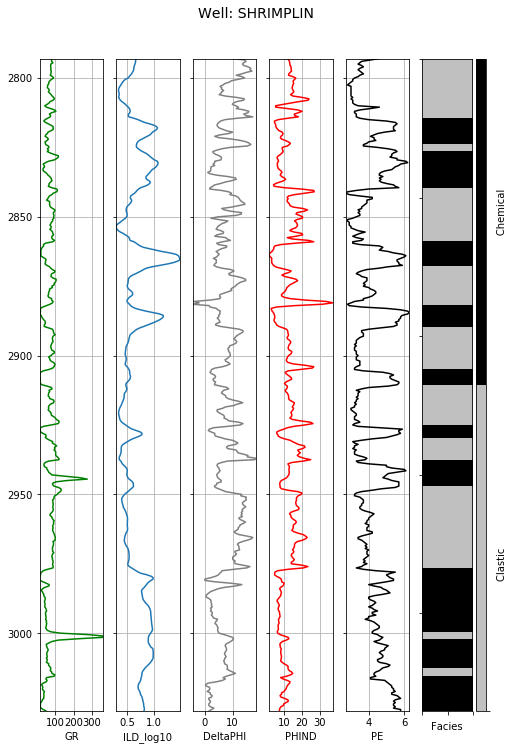

In [9]:
make_facies_log_plot(
    training_data[training_data['Well Name'] == 'SHRIMPLIN'],
    facies_colors)

#### 히스토그램

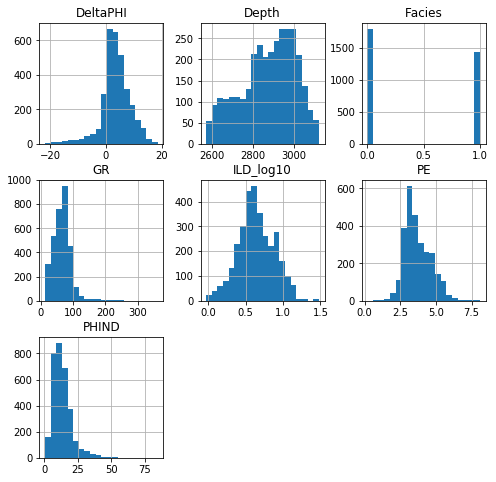

In [10]:
training_data.hist(bins=20, figsize=(8,8))
plt.show()

#### clossplot을 이용한 상관성 분석

C:\Users\Daeung\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


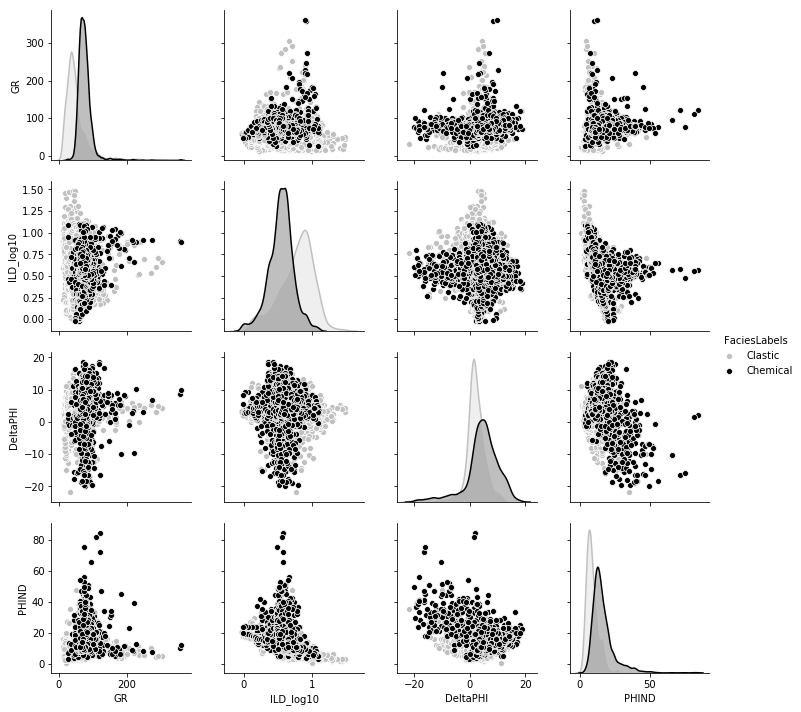

In [11]:
import seaborn as sns
sns_plot = sns.pairplot(training_data.drop(['Facies', 'Well Name', 'Depth', 'PE', 'NM_M'], axis=1),
             hue="FaciesLabels", palette=facies_color_map, hue_order=list(facies_labels))

In [12]:
training_data.head()

,Facies,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,FaciesLabels
0,0,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,NM,Chemical
1,0,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,NM,Chemical
2,0,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,NM,Chemical
3,0,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,NM,Chemical
4,0,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,NM,Chemical


In [13]:
# 시각화를 위해 생성된 FaciesLabels 특성 제거
training_data = training_data.drop(['FaciesLabels'], axis=1)

## 2.8 검증 데이터세트 만들기

#### 무작위 샘플링

In [14]:
from sklearn.model_selection import train_test_split
train_set, val_set = train_test_split(training_data, test_size=0.2, random_state=10)

In [15]:
train_set["Facies"].value_counts() / len(train_set)

0    0.559381
1    0.440619
Name: Facies, dtype: float64

In [16]:
val_set["Facies"].value_counts() / len(val_set)

0    0.540958
1    0.459042
Name: Facies, dtype: float64

#### 계층적 샘플링

In [17]:
train_set, val_set = train_test_split(training_data, test_size=0.2, stratify=training_data['Facies'],
                                      random_state=10)

In [18]:
train_set["Facies"].value_counts() / len(train_set)

0    0.555513
1    0.444487
Name: Facies, dtype: float64

In [19]:
val_set["Facies"].value_counts() / len(val_set)

0    0.556414
1    0.443586
Name: Facies, dtype: float64

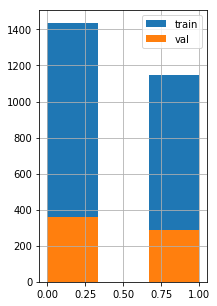

In [20]:
train_set["Facies"].hist(bins=3, figsize=(3, 5))
val_set["Facies"].hist(bins=3, figsize=(3, 5))
plt.legend(['train', 'val'])
plt.show()

## 2.9 데이터 전처리

In [21]:
X_train_num_pd = train_set[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']]
X_train_cat_pd = train_set['NM_M']

In [22]:
y_train_np = train_set['Facies'].values

In [23]:
train_set_orig = train_set.copy()

### 2.9.1 누락 데이터 처리

In [24]:
X_train_num_pd[X_train_num_pd.isnull().any(axis=1)]

,GR,ILD_log10,DeltaPHI,PHIND,PE
2584,19.90,0.623,-7.7,11.45,NaN
2545,29.42,0.846,0.3,4.95,NaN
2771,45.19,0.787,4.5,8.95,NaN
2727,75.05,0.515,11.5,19.55,NaN
2766,25.62,0.826,0.7,6.25,NaN
...,...,...,...,...,...
2788,39.69,1.035,2.4,6.40,NaN
2655,34.45,0.753,2.9,5.75,NaN
2618,59.53,0.605,10.2,13.30,NaN
2485,61.49,0.805,2.5,5.95,NaN


In [25]:
median_PE = X_train_num_pd['PE'].median()
X_train_num_pd['PE'].fillna(median_PE, inplace=True)

In [26]:
X_train_num_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585 entries, 2584 to 373
Data columns (total 5 columns):
GR           2585 non-null float64
ILD_log10    2585 non-null float64
DeltaPHI     2585 non-null float64
PHIND        2585 non-null float64
PE           2585 non-null float64
dtypes: float64(5)
memory usage: 121.2 KB


In [27]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")
X_train_num_np_cls = imputer.fit_transform(X_train_num_pd)

C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### 2.9.2 원-핫 인코딩

`factorize()`를 이용한 정수형 변환

In [28]:
X_train_cat_np_encoded, X_train_cat_np_categories = X_train_cat_pd.factorize()
X_train_cat_np_encoded[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
X_train_cat_np_categories

Index(['M', 'NM'], dtype='object')

정수형을 `OneHotEncoder`이용하여 원-핫 형태로 변환

In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_cat_1hot_sparse = encoder.fit_transform(X_train_cat_np_encoded.reshape(-1,1))
X_train_cat_1hot_sparse

C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<2585x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2585 stored elements in Compressed Sparse Row format>

In [31]:
X_train_cat_np = X_train_cat_1hot_sparse.toarray()
X_train_cat_np

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

위의 두 작업을 아래의 `CategoricalEncoder` 클래스를 이용하면 한번에 수행할 수 있다.  

In [32]:
# CategoricalEncoder 클래스는 사이킷런 0.20에 포함될 예정

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [33]:
cat_encoder = CategoricalEncoder()
X_train_cat_one_hot = cat_encoder.fit_transform(X_train_cat_pd.values.reshape(-1, 1))
X_train_cat_one_hot

<2585x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2585 stored elements in Compressed Sparse Row format>

### 2.9.3 데이터 스케일링

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num_pd)

In [35]:
X_train = np.hstack((X_train_num_scaled, X_train_cat_np))

In [36]:
X_train.shape

(2585, 7)

### 2.9.4 파이프라인으로 자동화하기

숫자형/카테고리형 분리하는 변환기인 `DataFrameSelector` 생성

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [38]:
attributes = ['NM_M']
selector = DataFrameSelector(attributes)
selector.fit_transform(train_set_orig)

array([['M'],
       ['M'],
       ['M'],
       ...,
       ['M'],
       ['M'],
       ['M']], dtype=object)

숫자형/카테고리형 파이프라인 

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

num_attribs = ["GR", "ILD_log10", "DeltaPHI", "PHIND","PE"]
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


cat_attribs = ["NM_M"]
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])


C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


숫자형/카테고리형 파이프라인 하나로 합치기

In [40]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

최종으로 완성된 하나의 파이프라인, `full_pipeline` 을 이용하여 전처리 수행

In [41]:
X_train = full_pipeline.fit_transform(train_set_orig)
X_val = full_pipeline.transform(val_set)

In [42]:
y_train = train_set_orig['Facies'].values
y_val = val_set['Facies'].values

### 2.10 머신러닝 알고리즘에 적용하기

로지스틱 회귀 모델 (`LogisticRegression`) 훈련

In [43]:
from sklearn.linear_model import LogisticRegression

lgst_reg = LogisticRegression()
lgst_reg.fit(X_train, y_train)

C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

훈련된 모델을 검증 데이터세트에 적용

In [44]:
pred_lgst = lgst_reg.predict(X_val)

### 모델 성능 평가

오차 행렬, 정확도(accuracy), 정밀도(precision), 재현율(recall), F1-score

In [45]:
from sklearn.metrics import confusion_matrix
conf_lgst = confusion_matrix(y_val, pred_lgst)
conf_lgst

array([[325,  35],
       [ 10, 277]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('< Logistic Regression >')
print('Accuracy : ', accuracy_score(y_val, pred_lgst))
print('Precision: ', precision_score(y_val, pred_lgst))
print('Recall   : ', recall_score(y_val, pred_lgst))
print('f1_score : ', f1_score(y_val, pred_lgst))


< Logistic Regression >
Accuracy :  0.9304482225656878
Precision:  0.8878205128205128
Recall   :  0.9651567944250871
f1_score :  0.9248747913188647


ROC curve

In [47]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, pred_lgst)

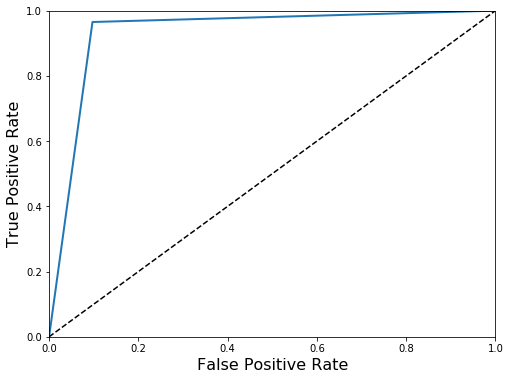

In [48]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()